In [77]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.stats import mode
from matplotlib.colors import ListedColormap

In [4]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']

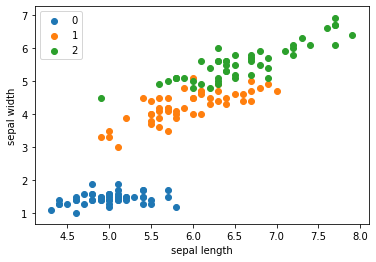

In [12]:
plt.scatter(df[:50]['sepal length'], df[:50]['petal length'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['petal length'], label='1')
plt.scatter(df[100:150]['sepal length'], df[100:150]['petal length'], label='2')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend()

In [136]:
class KNN:
    def __init__(self,train_X,train_y,k=3,p=2):
        self.train_X = train_X
        self.train_y = train_y
        self.k = k
        self.p = p

    def predict(self,X):
        dist = cdist(X, self.train_X , 'minkowski', p=self.p)
        index_array = np.argpartition(dist , kth=self.k, axis=-1)[:,:self.k]
        prediction = mode(self.train_y[index_array].transpose())[0][0]
        return prediction


In [137]:
data = np.array(df.iloc[:150, [0, 2, -1]])
X, y = data[:,:-1], data[:,-1]

In [140]:
def plot_decision_boundary(clf , axes):
    xp=np.linspace(axes[0], axes[1], 300)
    yp=np.linspace(axes[2], axes[3], 300)
    x1, y1=np.meshgrid(xp, yp) 
    xy=np.c_[x1.ravel(), y1.ravel()]
    y_pred = clf.predict(xy).reshape(x1.shape) 
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, y1, y_pred, alpha=0.3, cmap=custom_cmap)

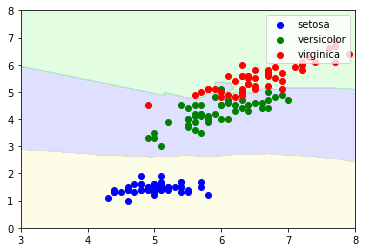

In [142]:
clf = KNN(X,y,k=2)
plot_decision_boundary(clf, axes=[3, 8, 0, 8])
p1=plt.scatter(X[y==0,0], X[y==0, 1], color='blue')
p2=plt.scatter(X[y==1,0], X[y==1, 1], color='green')
p3=plt.scatter(X[y==2,0], X[y==2, 1], color='red')
plt.legend([p1, p2, p3], iris['target_names'], loc='upper right')
plt.show()